Enter a year to lookup GDP: 1965
GDP in 1965  was 17.2  billion dollars which is -20.0 % different than 1970.


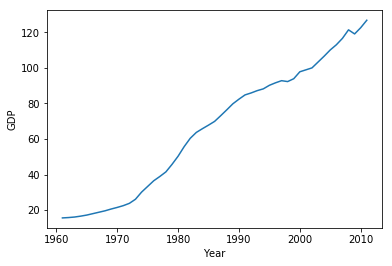

In [66]:
#Data Analysis of GDP Data Stored as a CSV File

#Create an empty dictionary that has key the year and value the GDP for that year
#Create two empty lists to store year and GDP data

dict={}
listg=[]
listy=[]

import csv
with open("36100293.csv", "r") as infile:
    csvfile = csv.reader(infile)
    for row in csvfile:
        #print(row)
        if row[4] == "Gross domestic product (GDP) at market prices" and row[3] == "Implicit chain price index 2002=100":
            dict[int(row[0])]=float(row[11])
            listg.append(float(row[11]))
            listy.append(int(row[0])) 
gdp1970=dict[1970]

#Prompt the user for a year and output the GDP for that year from the dictonary
#Calculate and print the GDP change from the user year and the GDP in the 1970
year=input("Enter a year to lookup GDP: ")
print("GDP in",year," was",dict[int(year)]," billion dollars which is",(100*dict[int(year)]/dict[1970])-100,"% different than 1970.")

#Calculate and print the GDP change from the user year and the GDP in the 1970
import matplotlib.pyplot as plt
plt.plot(listy,listg)
plt.xlabel("Year")
plt.ylabel("GDP")                 
plt.show()

Number of data rows for Canada:  216
Number of data rows:  18
Number of data rows:  18
         Income concept    VALUE
108  Average income tax  12400.0
109  Average income tax  16000.0
110  Average income tax   9700.0
111  Average income tax   9000.0


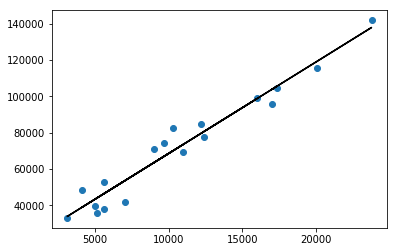

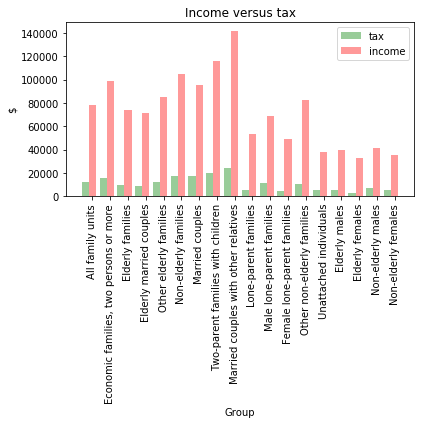

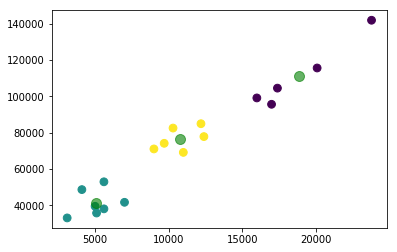

In [4]:
#Data Analysis Pipeline using Python Modules

#Download zip file using urllib
import urllib.request
import zipfile
urllib.request.urlretrieve("https://www150.statcan.gc.ca/n1/tbl/csv/11100032-eng.zip","11100032-eng.zip")
with zipfile.ZipFile('11100032-eng.zip',"r") as z:
    z.extractall("531lab3zip//")

import pandas as pd
import numpy as np

count=0
data = pd.read_table("11100032.csv", sep= ",")  #read CSV file
data.head(6)  #Show first 6 rows of data
filterData= data[data["GEO"] == "Canada"]
#print(filterData)
for row in data["GEO"]:
    #print(row)
    if str(row)=="Canada":
        count = count + 1
        
print("Number of data rows for Canada: ",count)

filterDataIV = filterData[['Income concept','VALUE']]
filterDataAvgTa = filterDataIV[filterDataIV["Income concept"] == "Average income tax"]
filterDataAvgIn = filterDataIV[filterDataIV["Income concept"] == "Average total income"]

#filterDataAvgTa.head(4)
print("Number of data rows: ",len(filterDataAvgTa.index))
print("Number of data rows: ",len(filterDataAvgIn.index))
print(filterDataAvgTa.head(4))

#Perform and graph the output for a linear regression (tax, income) on the VALUE column for these two data subsets
from scipy import stats
import matplotlib.pyplot as plt

x = np.array(filterDataAvgTa['VALUE'])
y = np.array(filterDataAvgIn['VALUE'])

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
predict_y = intercept + slope * x
pred_error = y -predict_y
degr_freedom = len(x) -2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.show()

#Create a matplotlib bar chart with bars for tax and income and x-axis labels the family categories (Economic family type)
%matplotlib inline

Bar_Data = (filterData[['Income concept','VALUE','Economic family type']])
data1 = (filterDataAvgTa['VALUE'])
data2 = (filterDataAvgIn['VALUE'])

plt.figure(figsize=(6,6))

index = np.arange(len(data1))
bar_width = 0.40
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, data1, bar_width, alpha=opacity,color='g', yerr=None, error_kw=error_config, label='tax')
rects2 = plt.bar(index + bar_width, data2, bar_width, alpha=opacity,color='r', yerr=None, error_kw=error_config, label='income')
                 
plt.xlabel('Group')
plt.ylabel('$')
plt.title('Income versus tax')
plt.xticks(index + bar_width, (Bar_Data["Economic family type"]),rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

#Perform a k-means clustering with 3 clusters and graph results
from sklearn.cluster import KMeans 

cluster=np.vstack((data1,data2)).T
Kmeans = KMeans(n_clusters=3).fit(cluster)
Kmeans.labels_

y_Kmeans=Kmeans.predict(cluster)
plt.scatter(cluster[:,0], cluster[:,1], c=y_Kmeans,s=60,cmap='viridis')

center=Kmeans.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='green',s=100,alpha=0.6)